In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, RandomFlip, RandomRotation, RandomTranslation, RandomZoom
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet50 import decode_predictions, preprocess_input
from sklearn.metrics import ConfusionMatrixDisplay as cmd

In [3]:
def load_images_from_path(path, label):
    images, labels = [], []

    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size = (224,224,3))
        images.append(image.img_to_array(img))
        labels.append((label))

    return images, labels

In [4]:
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20,20),
        subplot_kw={'xticks':[], 'yticks':[]})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_train, y_train, x_test, y_test = [], [], [], []

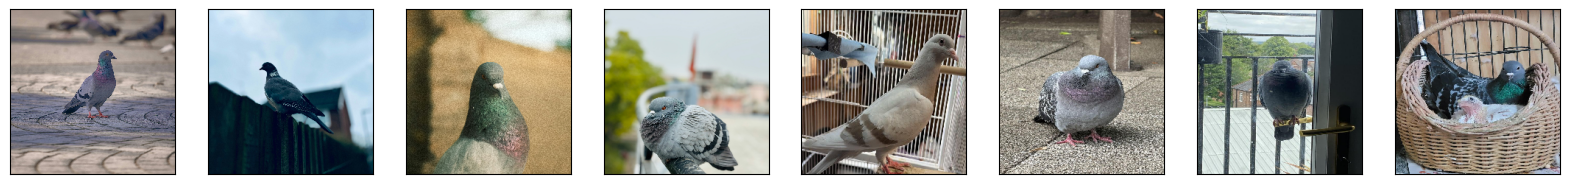

In [5]:
images, labels = load_images_from_path('images/train/pigeons', 0)
show_images(images)

x_train += images
y_train += labels

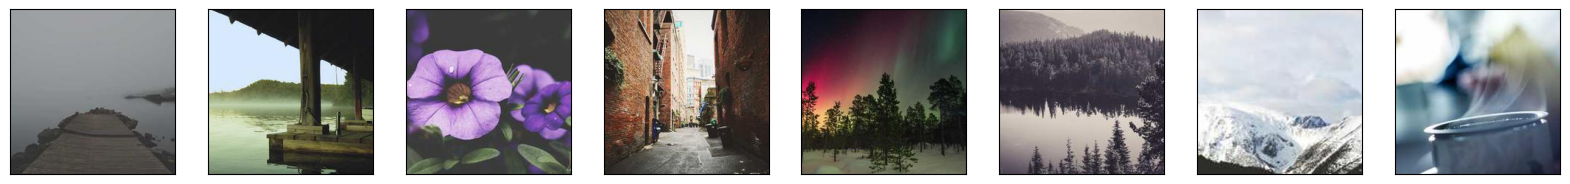

In [6]:
images, labels = load_images_from_path('images/train/not_pigeons', 1)
show_images(images)

x_train += images
y_train += labels

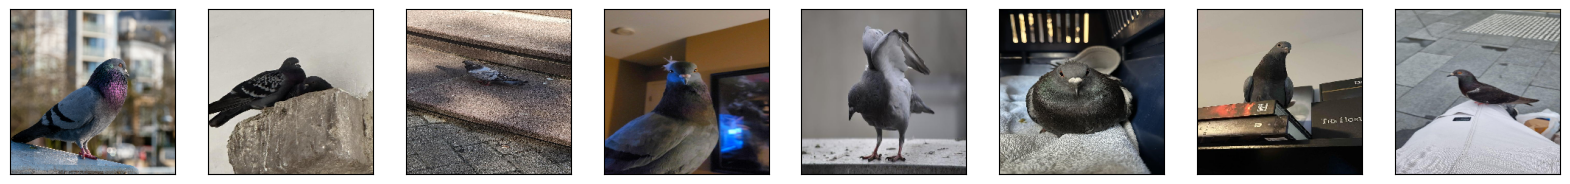

In [7]:
images, labels = load_images_from_path('images/test/pigeons', 0)
show_images(images)

x_test += images
y_test += labels

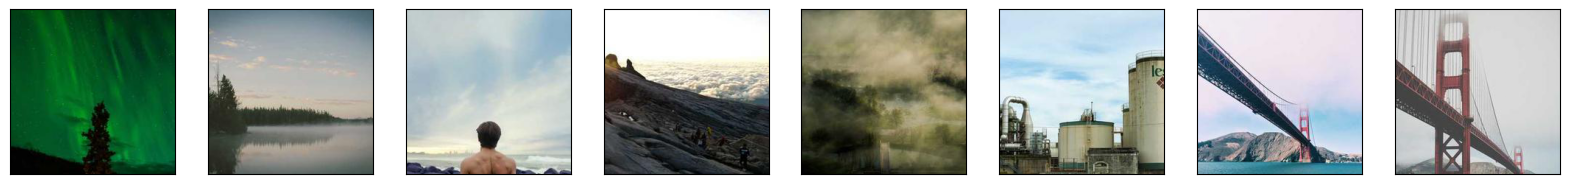

In [8]:
images, labels = load_images_from_path('images/test/not_pigeons', 1)
show_images(images)

x_test += images
y_test += labels

In [9]:
x_train = preprocess_input(np.array(x_train)) / 255
x_test = preprocess_input(np.array(x_test)) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

In [10]:
base_model = ResNet50V2(weights='imagenet', include_top=False)

x_train = base_model.predict(x_train)
x_test = base_model.predict(x_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 32s 794ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step


In [11]:
model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=20, epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 644ms/step - accuracy: 0.9235 - loss: 3.8335 - val_accuracy: 0.9781 - val_loss: 2.0087
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 644ms/step - accuracy: 0.9854 - loss: 0.8144 - val_accuracy: 0.9861 - val_loss: 1.2200
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 666ms/step - accuracy: 0.9937 - loss: 0.3542 - val_accuracy: 0.9801 - val_loss: 1.4671
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 680ms/step - accuracy: 0.9908 - loss: 0.2626 - val_accuracy: 0.9821 - val_loss: 1.9073
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 683ms/step - accuracy: 0.9945 - loss: 0.2726 - val_accuracy: 0.9761 - val_loss: 2.6254
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 685ms/step - accuracy: 0.9933 - loss: 0.3951 - val_accuracy: 0.9841 - val_loss: 1.5941
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 689ms/step - accuracy: 0.9977 - loss: 0.0058 - val_accuracy: 0.9801 - val_loss: 1.9195
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 684ms/step - accuracy: 1.0000 - loss: 2.0709e-16 - val_

[]

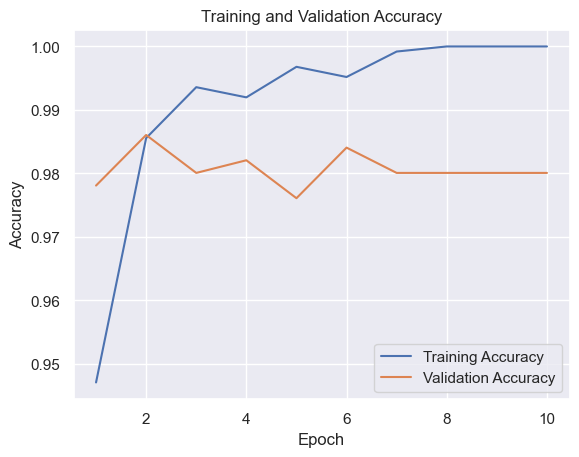

In [13]:
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label = 'Training Accuracy')
plt.plot(epochs, val_acc, '-', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [15]:
x = image.load_img('insert a picture of something that's not a pigeon', target_size=(224,224))

plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [16]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = base_model.predict(x)
predictions = model.predict(y)

if predictions[0][0] == 0:
    print('This is a pigeon')

else:
    print('This is not a pigeon')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
This is not a pigeon


In [17]:
x = image.load_img('insert pigeon photo here', target_size=(224,224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [18]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = base_model.predict(x)
predictions = model.predict(y)

if predictions[0][0] == 0:
    print('This is a pigeon')

else:
    print('This is not a pigeon')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This is a pigeon


In [19]:
model.save('pigeons_cnn.keras')